## Getting started with bombcell

#### Install bombcell

Create a conda environment
```bash
conda create -n bombcell python=3.11
conda activate bombcell
```
Clone latest bombcell repository from github
```bash
git clone https://github.com/Julie-Fabre/bombcell.git
```
Install bombcell from local repository
```bash
cd bombcell/pyBombCell
# you could do `pip install .`, but uv is much quicker!
pip install uv
uv pip install . # or uv pip install -e . (-e for editable mode)
```

#### Setting up bombcell - importing packages

In [1]:
import os, sys
from pathlib import Path
from pprint import pprint 

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt

In [2]:
# Optional

# # Add bombcell to Python path if NOT installed with pip
# # If notebook is running in bombcell repo:
# demo_dir = Path(os.getcwd())
# pyBombCell_dir = demo_dir.parent
# # Else:
# # pyBombCell_dir = "path/to/bombcell/repository/root"
# sys.path.append(str(pyBombCell_dir))

In [3]:
%load_ext autoreload
%autoreload 2

import bombcell as bc

#### Setting up - define data paths and get parameters

By default: path to BombCell's toy dataset

In [4]:
# Replace with your kilosort directory
ks_dir = "/home/jf5479/Dropbox/Example datatsets/JF093_2023-03-09_site1"

# Set bombcell's output directory
save_path = Path(ks_dir) / "bombcell"

In [5]:
## For Neuropixels probes, provide raw and meta files
# Leave 'None' if no raw data
raw_file_path = None#"/home/julie/Dropbox/Example datatsets/JF093_2023-03-09_site1/site1/2023-03-09_JF093_g0_t0_bc_decompressed.imec0.ap.bin" # ks_dir
meta_file_path = None#"/home/julie/Dropbox/Example datatsets/JF093_2023-03-09_site1/site1/2023-03-09_JF093_g0_t0.imec0.ap.meta"
param = bc.get_default_parameters(ks_dir, 
                                  raw_file=raw_file_path,
                                  meta_file=meta_file_path,
                                  kilosort_version=2)

print("Bombcell parameters:")
pprint(param)

Bombcell parameters:
{'computeDistanceMetrics': False,
 'computeDrift': False,
 'computeSpatialDecay': True,
 'computeTimeChunks': False,
 'decompress_data': False,
 'deltaTimeChunk': 360,
 'detrendWaveform': True,
 'driftBinSize': 60,
 'duplicateSpikeWindow_s': 1e-05,
 'ephysKilosortPath': '/home/jf5479/Dropbox/Example '
                      'datatsets/JF093_2023-03-09_site1',
 'ephys_meta_file': None,
 'ephys_sample_rate': 30000,
 'extractRaw': True,
 'gain_to_uV': None,
 'hillOrLlobetMethod': True,
 'isoDmin ': 20,
 'keep_only_somatic': True,
 'lratioMax': 0.3,
 'maxDrift': 100,
 'maxMainPeakToTroughRatio_nonSomatic': 0.8,
 'maxNPeaks': 2,
 'maxNTroughs': 1,
 'maxPeak1ToPeak2Ratio_nonSomatic': 3,
 'maxPercSpikesMissing': 20,
 'maxRPVviolations': 0.1,
 'maxScndPeakToTroughRatio_noise': 0.8,
 'maxSpatialDecaySlopeExp': 0.1,
 'maxWvBaselineFraction': 0.3,
 'maxWvDuration': 1150,
 'minAmplitude': 40,
 'minNumSpikes': 300,
 'minPresenceRatio': 0.7,
 'minSNR': 5,
 'minSpatialDecaySlope':

In [5]:
## For non-Neuropixels probes, provide raw files AND specify conversion factor to uV
# raw_file_path = "" # .bin, .dat...
# param = bc.get_default_parameters(ks_dir, 
#                                   raw_file=raw_file_path,
#                                   meta_file=meta_file_path)

# print("BombCell parameters:")
# pprint(param)
# param["gain_to_uV"] = None # needs to be passed explicitly to bc.get_default_parameters
# param["ephys_sampling_rate"] = 30_000
# param["nChannels"] = 385
# param["nSyncChannels"] = 1

##### Optionally, you can customize parameters (more on this later, below)

In [14]:

# param["maxRPVviolations"] = 0.1
param["computeDistanceMetrics"] = False
param["computeDrift"] = False
param["computeTimeChunks"] = False
param["tauR_valuesMin"] = 2/1000
param["tauR_valuesMax"] = 2/1000
# ...
param['reextractRaw'] = False

#### Run bombcell, get unit types and save results 

🚀 Starting BombCell quality metrics pipeline...
📁 Processing data from: /home/jf5479/Dropbox/Example datatsets/JF093_2023-03-09_site1
Results will be saved to: /home/jf5479/Dropbox/Example datatsets/JF093_2023-03-09_site1/bombcell

Loading ephys data...
Loaded ephys data: 143 units, 9,016,856 spikes

⚙️ Computing quality metrics for 143 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/143 units


Saving GUI visualization data...
GUI visualization data saved to: /home/jf5479/Dropbox/Example datatsets/JF093_2023-03-09_site1/bombcell/for_GUI/gui_data.pkl
   Generated spatial decay fits: 138/143 units
   Generated amplitude fits: 127/143 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...


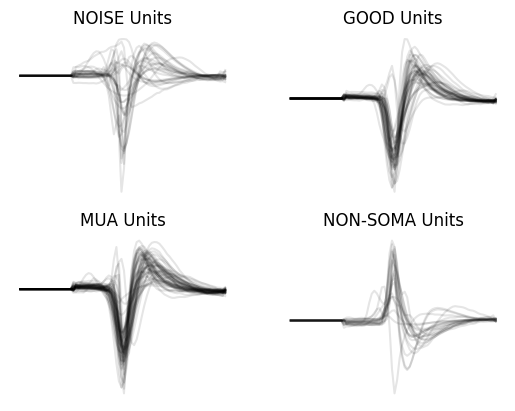

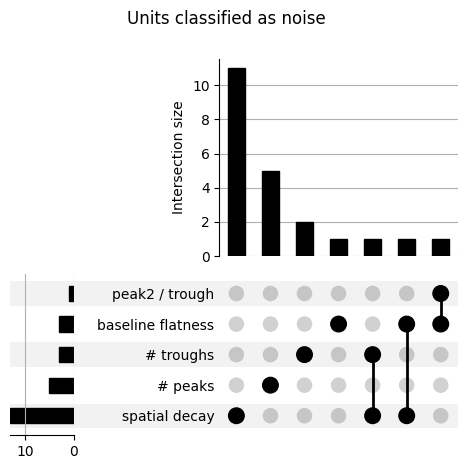

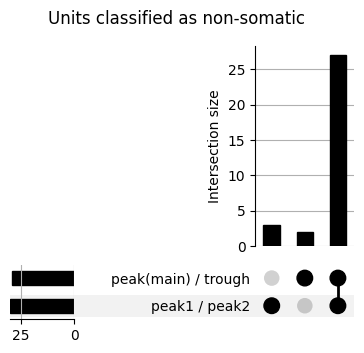

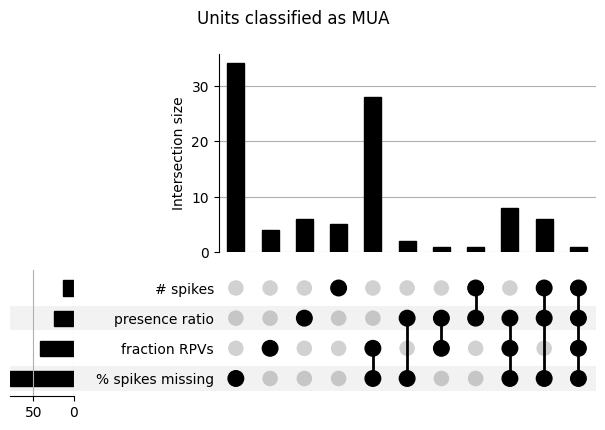

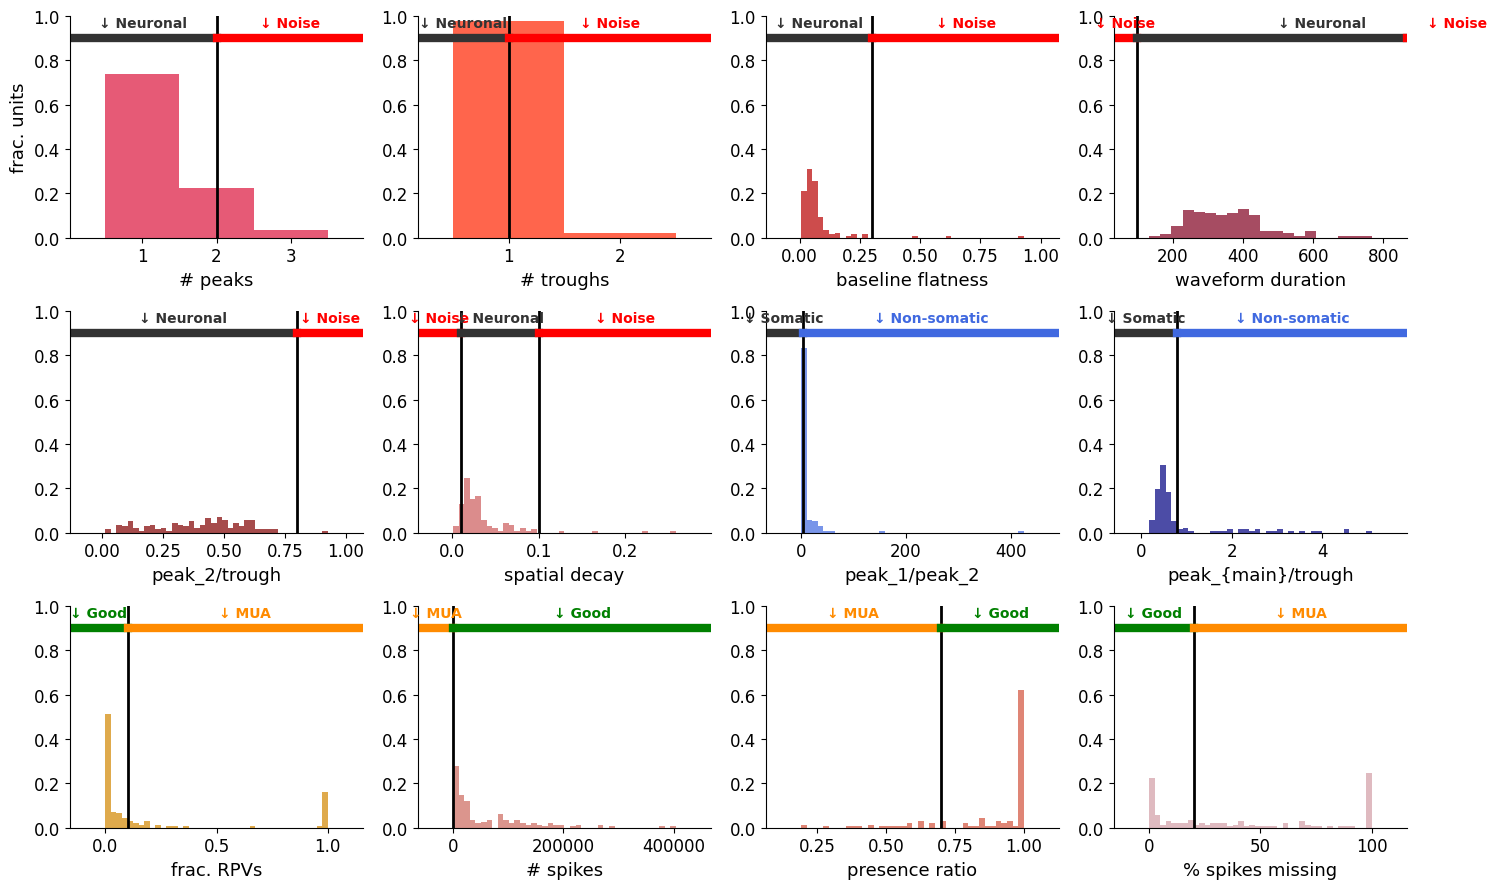


Saving results...
All expected metrics were successfully saved.


In [15]:
(
    quality_metrics,
    param,
    unit_type,
    unit_type_string,
) = bc.run_bombcell(
    ks_dir, save_path, param
)

Reload quality metrics table

In [11]:
# quality metric values
quality_metrics_table = pd.DataFrame(quality_metrics)
quality_metrics_table.insert(0, 'Bombcell_unit_type', unit_type_string)
quality_metrics_table

,Bombcell_unit_type,phy_clusterID,nSpikes,nPeaks,nTroughs,waveformDuration_peakTrough,spatialDecaySlope,waveformBaselineFlatness,scndPeakToTroughRatio,mainPeakToTroughRatio,peak1ToPeak2Ratio,troughToPeak2Ratio,mainPeak_before_width,mainTrough_width,percentageSpikesMissing_gaussian,percentageSpikesMissing_symmetric,RPV_window_index,fractionRPVs_estimatedTauR,presenceRatio,maxDriftEstimate,cumDriftEstimate,rawAmplitude,signalToNoiseRatio,isolationDistance,Lratio,silhouetteScore,useTheseTimesStart,useTheseTimesStop,maxChannels
0,MUA,0,4428.0,1.0,1.0,300.000000,0.025852,0.027249,0.397105,0.397105,0.045718,55.082066,NaN,3.784376,3.275498,0.000000,0.0,0.000000,1.000000,10.133327,82.917850,NaN,NaN,18.243968,0.424067,NaN,1440.003833,3960.003833,1
1,NOISE,1,26871.0,2.0,1.0,433.333333,0.001318,0.282522,0.691792,0.691792,0.408391,3.539549,4.747978,10.218586,86.708492,32.137085,19.0,1.000000,1.000000,13.275711,144.873276,NaN,NaN,10.602883,2.096542,NaN,0.003833,4320.003833,0
2,MUA,2,16076.0,2.0,1.0,600.000000,0.022720,0.159244,0.345212,0.345212,0.461294,6.279655,NaN,8.733908,100.000000,14.192687,0.0,1.000000,1.000000,88.453358,213.591850,NaN,NaN,10.429920,2.111867,NaN,0.003833,4320.003833,1
3,MUA,3,139.0,1.0,1.0,400.000000,0.011218,0.066674,0.395594,0.395594,0.137908,18.329981,NaN,6.116575,18.983960,30.500000,0.0,0.000000,1.000000,5.777985,10.515095,NaN,NaN,11.271841,2.140413,NaN,2880.003833,3240.003833,2
4,MUA,4,15203.0,1.0,1.0,300.000000,0.026757,0.029057,0.543130,0.543130,0.013077,140.795959,NaN,4.727452,2.655620,0.000000,1.0,0.040586,1.000000,13.279846,45.543854,NaN,NaN,18.462630,0.413392,NaN,360.003833,2880.003833,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,MUA,138,5397.0,1.0,1.0,233.333333,0.031424,0.020925,0.318595,0.318595,0.126107,24.889740,2.805732,2.918676,70.007486,41.132199,0.0,0.000000,1.000000,27.574829,159.571777,NaN,NaN,4.697311,109.926822,NaN,0.003833,4320.003833,125
139,MUA,139,990.0,1.0,1.0,466.666667,0.026308,0.073812,0.440791,0.440791,0.151824,14.942636,NaN,6.648482,2.465755,0.000000,1.0,0.000000,1.000000,3.324951,4.408447,NaN,NaN,6.293041,35.527188,NaN,0.003833,360.003833,138
140,NON-SOMA,140,99.0,2.0,1.0,400.000000,0.066786,0.034273,0.255365,0.908673,3.558328,1.100506,2.350580,7.292709,100.000000,0.000000,19.0,0.000000,0.366197,74.517578,514.809448,NaN,NaN,6.763300,17.134950,NaN,0.003833,4320.003833,149
141,MUA,141,86.0,1.0,1.0,466.666667,0.033076,0.066439,0.410169,0.410169,0.171386,14.225288,6.076281,6.459551,4.151308,10.416667,19.0,0.000000,1.000000,12.711761,27.001373,NaN,NaN,5.895531,416.241952,NaN,3960.003833,4320.003833,30


In [13]:
# boolean table, if quality metrics pass threshold given parameters
boolean_quality_metrics_table = bc.make_qm_table(
    quality_metrics, param, unit_type_string
)
boolean_quality_metrics_table

,unit_type,Original ID,# peaks,# troughs,waveform duration,baseline flatness,peak2 / trough,spatial decay,# spikes,% spikes missing,presence ratio,fraction RPVs,max. drift,non somatic,peak(main) / trough,peak1 / peak2,isolation dist.,L-Ratio
0,MUA,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,NOISE,1,False,False,False,False,False,True,False,True,False,True,False,False,False,False,True,True
2,MUA,2,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True
3,MUA,3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
4,MUA,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,MUA,138,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
139,MUA,139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
140,NON-SOMA,140,False,False,False,False,False,False,True,True,True,False,False,True,True,True,True,True
141,MUA,141,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True


Example: get all quality metrics for unit 10

In [14]:
u = 12

units = quality_metrics_table.phy_clusterID
quality_metrics_table.loc[units == u, :]

,Bombcell_unit_type,phy_clusterID,nSpikes,nPeaks,nTroughs,waveformDuration_peakTrough,spatialDecaySlope,waveformBaselineFlatness,scndPeakToTroughRatio,mainPeakToTroughRatio,peak1ToPeak2Ratio,troughToPeak2Ratio,mainPeak_before_width,mainTrough_width,percentageSpikesMissing_gaussian,percentageSpikesMissing_symmetric,RPV_window_index,fractionRPVs_estimatedTauR,presenceRatio,maxDriftEstimate,cumDriftEstimate,rawAmplitude,signalToNoiseRatio,isolationDistance,Lratio,silhouetteScore,useTheseTimesStart,useTheseTimesStop,maxChannels
12,MUA,12,30243.0,1.0,1.0,366.666667,0.018541,0.046643,0.490515,0.490515,0.078153,26.085773,NaN,5.260707,70.517418,42.557314,0.0,0.327997,1.0,15.802353,69.020111,NaN,NaN,21.661644,0.184002,NaN,0.003833,4320.003833,14


### Interactive Unit Quality GUI

Launch the interactive GUI to browse through units and examine quality metrics in detail.

In [ ]:
# Launch minimal GUI
gui = bc.unit_quality_gui(
    ks_dir=ks_dir,
    quality_metrics=quality_metrics,
    unit_types=unit_type,
    param=param,
    save_path=save_path
)

Loaded GUI data from: /home/jf5479/Dropbox/Example datatsets/JF093_2023-03-09_site1/bombcell/for_GUI/gui_data.pkl
🚀 Auto-loaded GUI data from: /home/jf5479/Dropbox/Example datatsets/JF093_2023-03-09_site1/bombcell/for_GUI/gui_data.pkl
GUI data loaded successfully!
   Data types available: ['peak_locations', 'trough_locations', 'peak_loc_for_duration', 'trough_loc_for_duration', 'peak_trough_labels', 'duration_lines', 'spatial_decay_fits', 'amplitude_fits', 'channel_arrangements', 'waveform_scaling', 'acg_data', 'per_bin_metrics']
   Peak/trough detection: 138 units
   Spatial decay fits: 138 units
   Amplitude fits: 127 units
   ACG data: 138 units (computed on-demand)
Total units: 143


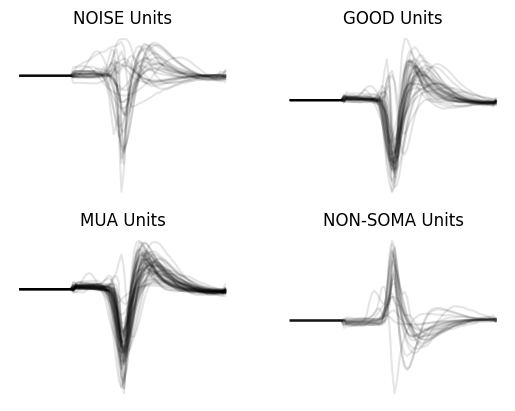

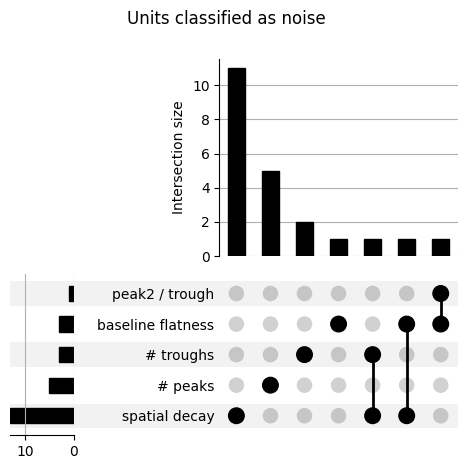

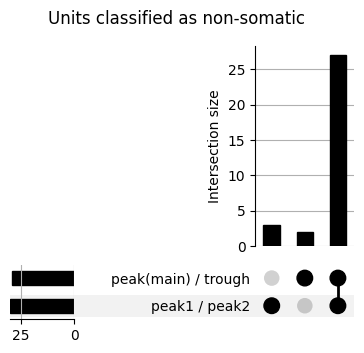

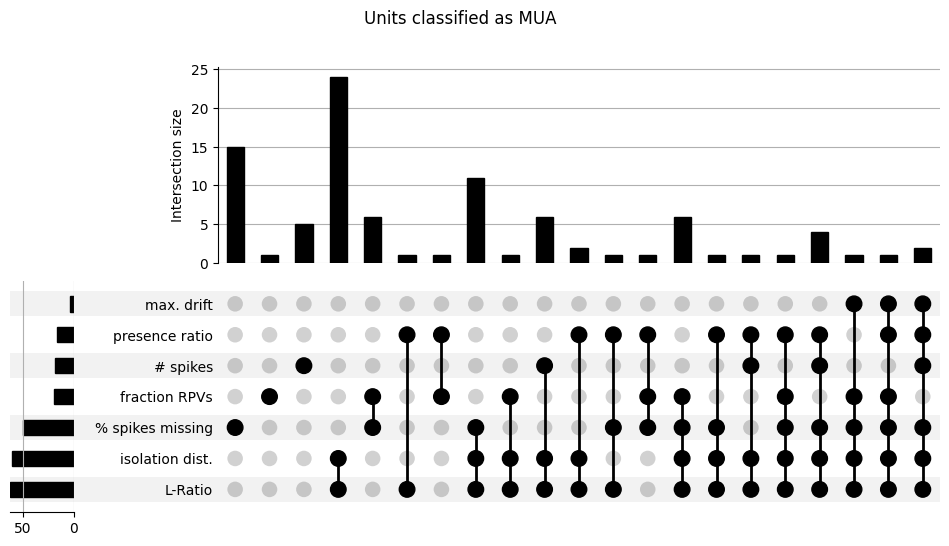

/home/jf5479/Dropbox/Python/bombcell/pyBombCell/bombcell/plot_functions.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_metrics['peak1ToPeak2Ratio'][quality_metrics['peak1ToPeak2Ratio'] == np.inf] = np.nan
/home/jf5479/Dropbox/Python/bombcell/pyBombCell/bombcell/plot_functions.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_metrics['troughToPeak2Ratio'][quality_metrics['troughToPeak2Ratio'] == np.inf] = np.nan


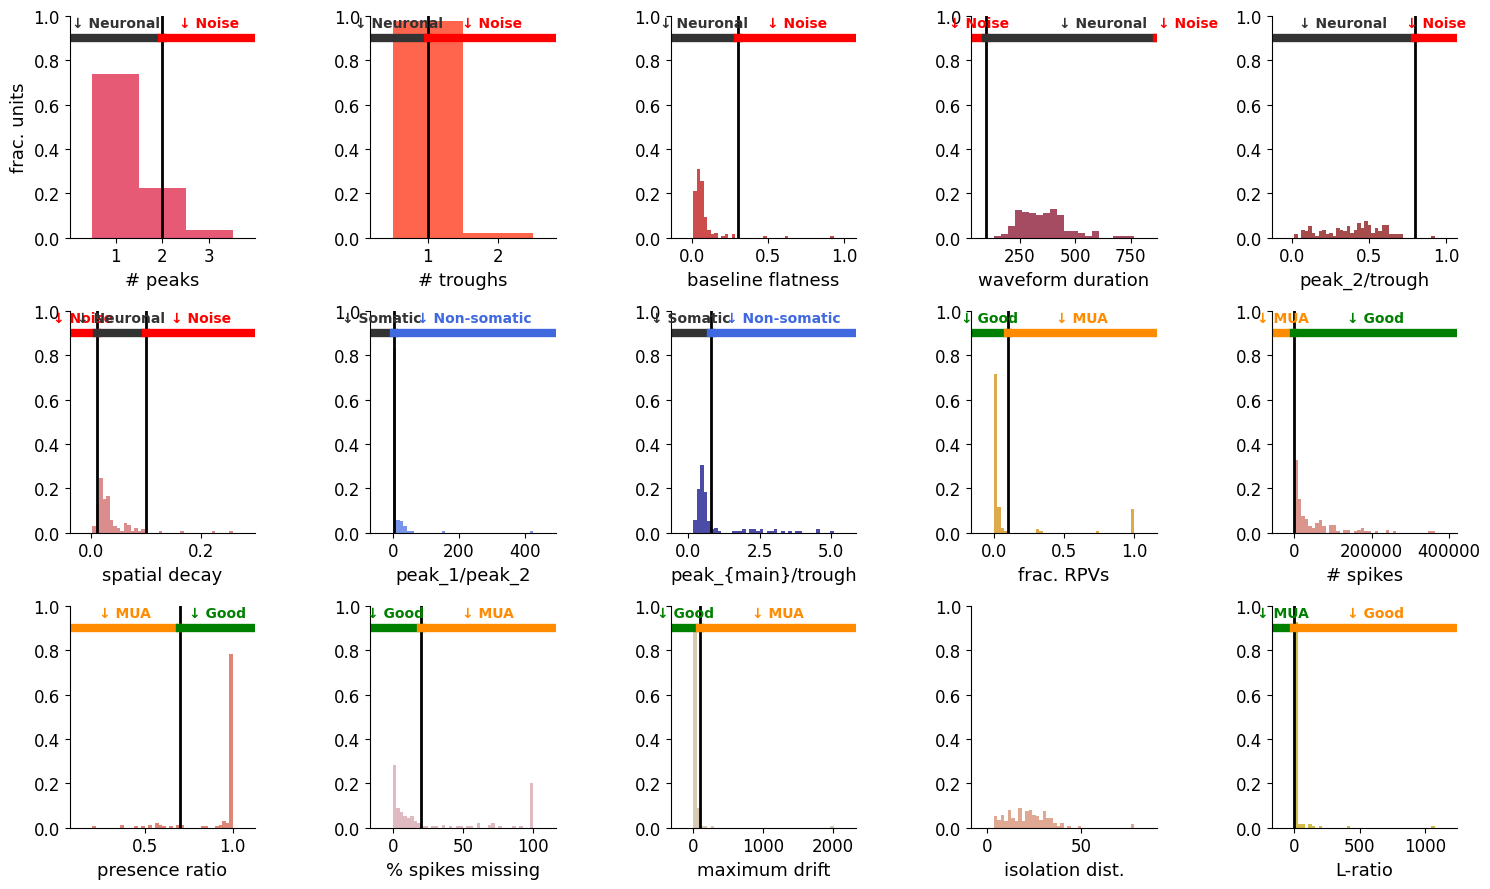

In [7]:
param["lratioMax"] = 0.3
# load previously computed quality metrics
param, quality_metrics, fractions_RPVs_all_taur = bc.load_bc_results(save_path)
unit_type, unit_type_string = bc.qm.get_quality_unit_type(
        param, quality_metrics
    )  # JF: this should be inside bc.get_all_quality_metrics
(
    spike_times_samples,
    spike_clusters, # actually spike_templates, but they're the same in bombcell
    template_waveforms,
    template_amplitudes,
    pc_features,
    pc_features_idx,
    channel_positions,
) = bc.load_ephys_data(ks_dir)
bc.plot_summary_data(quality_metrics, template_waveforms, unit_type, unit_type_string, param)


## Ephys Properties and Cell Type Classification

This section computes detailed electrophysiological properties and performs cell type classification based on waveform morphology and firing patterns.

BombCell can now compute detailed ephys properties and classify cell types based on waveform and firing patterns. This extends the quality metrics to include functional characterization of neurons.

In [ ]:
# Use the real dataset - now optimized for large datasets
ks_dir = "/home/jf5479/Dropbox/Example datatsets/JF093_2023-03-09_site1"
save_path = Path(ks_dir) / "bombcell"

print(f"Using kilosort directory: {ks_dir}")
print("Note: Ephys properties computation is now optimized for large datasets with batch processing")

In [47]:
# Load spike data needed for ephys properties
(
    spike_times_samples,
    spike_clusters,
    template_waveforms,
    template_amplitudes,
    pc_features,
    pc_features_idx,
    channel_positions,
) = bc.load_ephys_data(ks_dir)

In [48]:
# Compute ephys properties for cell type classification
ephys_param = bc.get_ephys_parameters(ks_dir)

# Compute all ephys properties using the correct function signature
ephys_properties, ephys_param = bc.run_all_ephys_properties(ks_dir, param)

Computing ephys properties for 15 units...


Computing ephys properties: 100%|██████████| 15/15 units

Ephys properties computation complete!
Ephys properties saved to: toy_data/templates._bc_ephysProperties.parquet
Parameters saved to: toy_data/_bc_ephysParameters.parquet


Classifying striatum neurons...


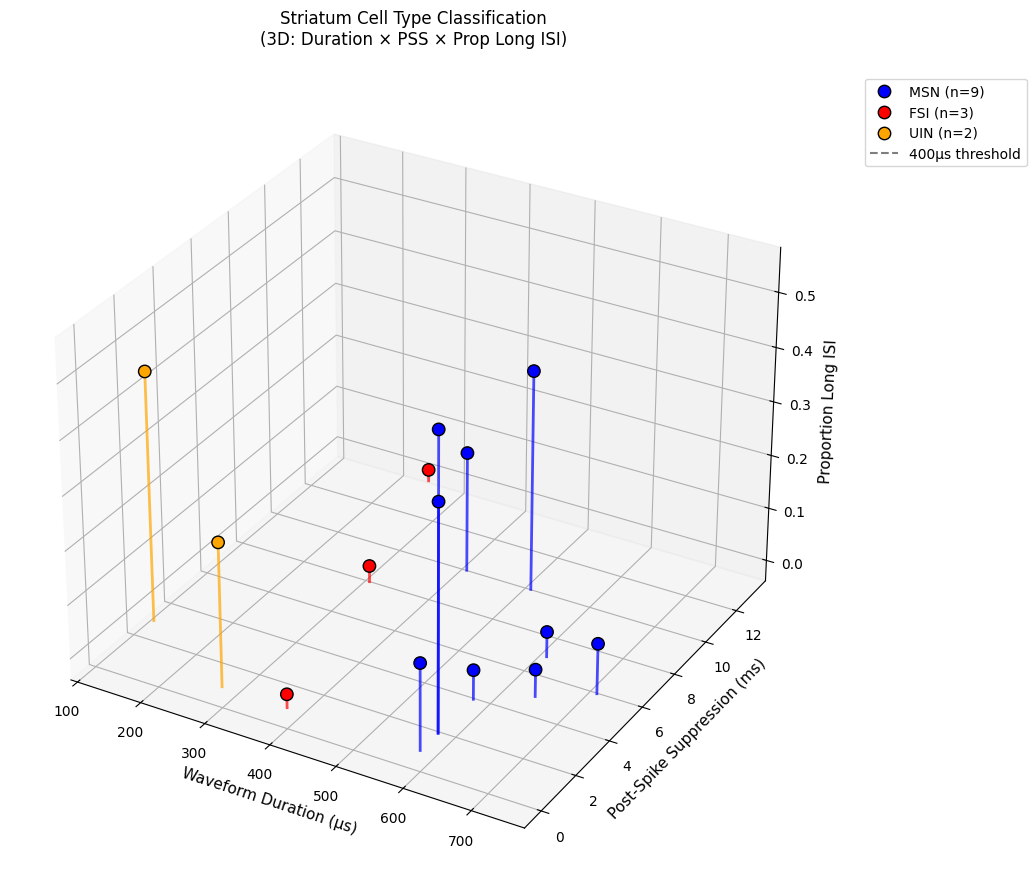

Plotted 14 units:
  Waveform duration range: 133-733 μs
  Post-spike suppression range: 0.0-13.0 ms
  Prop long ISI range: 0.021-0.541

Striatum cell type distribution:
  MSN: 9 (60.0%)
  FSI: 3 (20.0%)
  TAN: 0 (0.0%)
  UIN: 2 (13.3%)
  Unknown: 1 (6.7%)


In [49]:
# Cell type classification with automatic plot generation
# Specify brain region: 'cortex' or 'striatum'
brain_region = 'striatum'  # Change this to 'cortex' for cortical data

print(f"Classifying {brain_region} neurons...")
cell_types = bc.classify_and_plot_brain_region(ephys_properties, ephys_param, brain_region)

In [ ]:
# Show classification results
if cell_types is not None:
    # Create combined results table
    ephys_df = pd.DataFrame(ephys_properties)
    combined_table = ephys_df.copy()
    combined_table['cell_type'] = cell_types
    
    # Show sample results
    print(f"\nSample results:")
    print(combined_table[['unit_id', 'firing_rate_mean', 'waveformDuration_peakTrough_us', 'cell_type']].head())